In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import pathlib
import numpy as np
import IPython.display as display
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
data_dir_train = pathlib.Path("data/train/")
data_dir_test = pathlib.Path("data/test/")

In [3]:
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

In [4]:
image_count_train = len(list(data_dir_train.glob("*.jpg")))
image_count_test = len(list(data_dir_test.glob("*.jpg")))

In [9]:
CLASS_NAMES = np.array([item.name for item in data_dir_train.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['dogs', 'cats'], dtype='<U4')

In [10]:
BATCH_SIZE = 32
IMG_HEIGHT = 120
IMG_WIDTH = 120
STEPS_PER_EPOCH = np.ceil(image_count_train/BATCH_SIZE)

In [16]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir_train),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))


Found 25000 images belonging to 2 classes.


In [17]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==0][0].title())
      plt.axis('off')

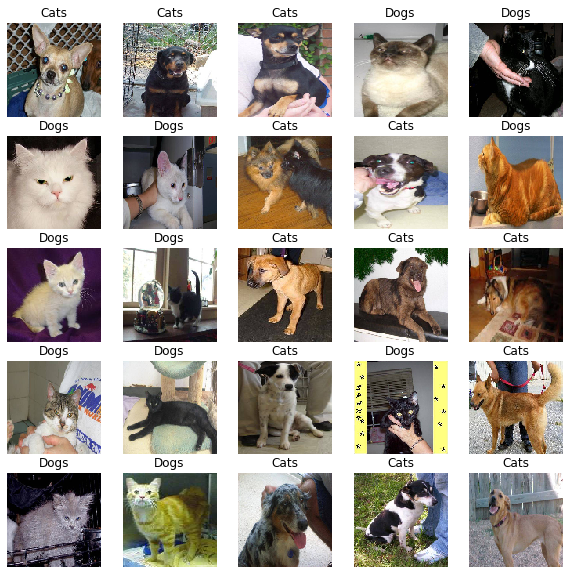

In [18]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

## loading tf.data is faster

In [20]:
list_ds = tf.data.Dataset.list_files(str(data_dir_train/'*/*'))

In [23]:
for f in list_ds.take(5):
  print(f.numpy())

b'data/train/cats/cat.11062.jpg'
b'data/train/dogs/dog.7286.jpg'
b'data/train/cats/cat.5487.jpg'
b'data/train/cats/cat.3889.jpg'
b'data/train/cats/cat.9762.jpg'
